# Assignment 1
## Preprocessing and Supervised Data Classification

Student: Vladyslav Lysenko

---

### Importing required dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,\
roc_curve, roc_auc_score
from utilities import visualize_classifier

### Part 1: Preprocessing

In [2]:
data = np.array([[5.1, -2.9, 3.3],
                 [-1.2, 7.8, -6.1],
                 [3.9, 0.4, 2.1],
                 [7.3, -9.9, -4.5]])

In [3]:
data_binarized = preprocessing.Binarizer(threshold=2.1).transform(data)
data_binarized

array([[1., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [4]:
mean, std = data.mean(axis=0), data.std(axis=0)
print(f"mean={mean}\nstd={std}")

mean=[ 3.775 -1.15  -1.3  ]
std=[3.12039661 6.36651396 4.0620192 ]


### Standartization (z-score normalization)

In [5]:
data_scaled = preprocessing.scale(data)
data_scaled

array([[ 0.42462551, -0.2748757 ,  1.13244172],
       [-1.59434861,  1.40579288, -1.18167831],
       [ 0.04005901,  0.24346134,  0.83702214],
       [ 1.12966409, -1.37437851, -0.78778554]])

In [6]:
mean, std = data_scaled.mean(axis=0), data_scaled.std(axis=0)
print(f"mean={mean}\nstd={std}")

mean=[1.11022302e-16 0.00000000e+00 2.77555756e-17]
std=[1. 1. 1.]


### Min-Max Scaling

In [7]:
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(data)
data_scaled_minmax

array([[0.74117647, 0.39548023, 1.        ],
       [0.        , 1.        , 0.        ],
       [0.6       , 0.5819209 , 0.87234043],
       [1.        , 0.        , 0.17021277]])

In [8]:
mean, std = data_scaled_minmax.mean(axis=0), data_scaled_minmax.std(axis=0)
print(f"mean={mean}\nstd={std}")

mean=[0.58529412 0.49435028 0.5106383 ]
std=[0.36710548 0.35969005 0.4321297 ]


### L1-L2 Normalization

In [9]:
data_normalized_l1 = preprocessing.normalize(data, norm="l1")
data_normalized_l2 = preprocessing.normalize(data, norm="l2")
print(data_normalized_l1,'\n\n',data_normalized_l2)

[[ 0.45132743 -0.25663717  0.2920354 ]
 [-0.0794702   0.51655629 -0.40397351]
 [ 0.609375    0.0625      0.328125  ]
 [ 0.33640553 -0.4562212  -0.20737327]] 

 [[ 0.75765788 -0.43082507  0.49024922]
 [-0.12030718  0.78199664 -0.61156148]
 [ 0.87690281  0.08993875  0.47217844]
 [ 0.55734935 -0.75585734 -0.34357152]]


### Label Encoding

In [10]:
input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white']

In [11]:
encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels);

In [12]:
for i, item in enumerate(encoder.classes_):
    print(item, '-->', i)

black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4


In [13]:
test_labels = ['green', 'red', 'black']
encoded_values = encoder.transform(test_labels)
print(test_labels)
print(list(encoded_values))

['green', 'red', 'black']
[1, 2, 0]


In [14]:
encoded_values = [3,0,4,1]
decoded_values = encoder.inverse_transform(encoded_values)
print(encoded_values)
print(list(decoded_values))

[3, 0, 4, 1]
['white', 'black', 'yellow', 'green']


### Part 2: New data preprocessing
Option 18

In [15]:
input_data = np.array([[4.6, 3.9, -3.5],
              [-2.9, 4.1, 3.3],
              [2.2, 8.8, -6.1],
              [3.9, 1.4, 2.2]])

### Binarization

In [16]:
data_binarized = preprocessing.Binarizer(threshold=2.1).transform(input_data)
data_binarized

array([[1., 1., 0.],
       [0., 1., 1.],
       [1., 1., 0.],
       [1., 0., 1.]])

In [17]:
mean, std = input_data.mean(axis=0), input_data.std(axis=0)
print(f"mean={mean}\nstd={std}")

mean=[ 1.95   4.55  -1.025]
std=[2.93300188 2.67441582 3.9047247 ]


### Standartization

In [18]:
data_scaled = preprocessing.scale(input_data)
data_scaled

array([[ 0.90351119, -0.24304373, -0.6338475 ],
       [-1.65359594, -0.16826104,  1.1076325 ],
       [ 0.0852369 ,  1.58913209, -1.2997075 ],
       [ 0.66484785, -1.17782731,  0.8259225 ]])

In [19]:
mean, std = data_scaled.mean(axis=0), data_scaled.std(axis=0)
print(f"mean={mean}\nstd={std}")

mean=[-2.77555756e-17  1.11022302e-16  2.77555756e-17]
std=[1. 1. 1.]


### Min-Max Scaling

In [20]:
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
data_scaled_minmax

array([[1.        , 0.33783784, 0.27659574],
       [0.        , 0.36486486, 1.        ],
       [0.68      , 1.        , 0.        ],
       [0.90666667, 0.        , 0.88297872]])

In [21]:
mean, std = data_scaled_minmax.mean(axis=0), data_scaled_minmax.std(axis=0)
print(f"mean={mean}\nstd={std}")

mean=[0.64666667 0.42567568 0.53989362]
std=[0.39106692 0.36140754 0.41539624]


### L1-L2 Normalization

In [22]:
data_normalized_l1 = preprocessing.normalize(input_data, norm="l1")
data_normalized_l2 = preprocessing.normalize(input_data, norm="l2")
print(data_normalized_l1,'\n\n',data_normalized_l2)

[[ 0.38333333  0.325      -0.29166667]
 [-0.2815534   0.39805825  0.32038835]
 [ 0.12865497  0.51461988 -0.35672515]
 [ 0.52        0.18666667  0.29333333]] 

 [[ 0.65970588  0.55931585 -0.50195013]
 [-0.4825966   0.68229174  0.54916164]
 [ 0.20125974  0.80503895 -0.55803836]
 [ 0.83129388  0.29841319  0.46893501]]


### Part 3: Logistic Regression Classification

In [23]:
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5],
             [6, 5], [5.6, 5], [3.3, 0.4],
             [3.9, 0.9], [2.8, 1],
             [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0,0,0,1,1,1,2,2,2,3,3,3])

In [24]:
classifier = linear_model.LogisticRegression(solver='liblinear', C=1)
classifier.fit(X,y);

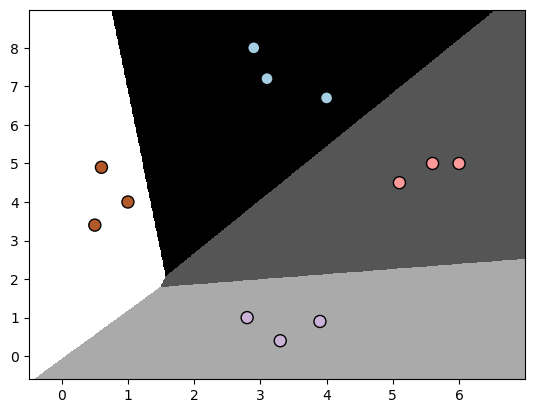

In [25]:
visualize_classifier(classifier, X, y)

### Part 4: Naive Bayes Classifier

In [26]:
data = np.loadtxt('data_multivar_nb.txt', delimiter=',')
X,y = data[:, :-1], data[:, -1]

In [27]:
classifier = GaussianNB()
classifier.fit(X, y);

In [28]:
y_pred = classifier.predict(X)
y_pred

array([0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0.,
       1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1.,
       2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2.,
       3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3.,
       0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 3., 3., 0., 1., 2., 3., 0.,
       1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1.,
       2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2.,
       3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3.,
       0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0.,
       1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1.,
       2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2.,
       3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3.,
       0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0.,
       1., 2., 3., 0., 1.

In [29]:
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
accuracy

99.75

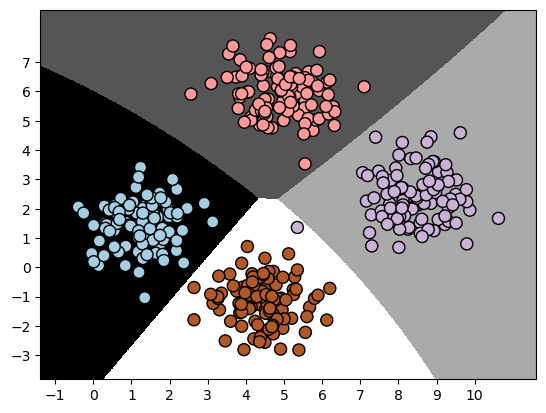

In [30]:
visualize_classifier(classifier, X,y)

### Train-Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [32]:
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train);

In [33]:
y_test_pred = classifier_new.predict(X_test)

In [34]:
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
accuracy

99.24242424242425

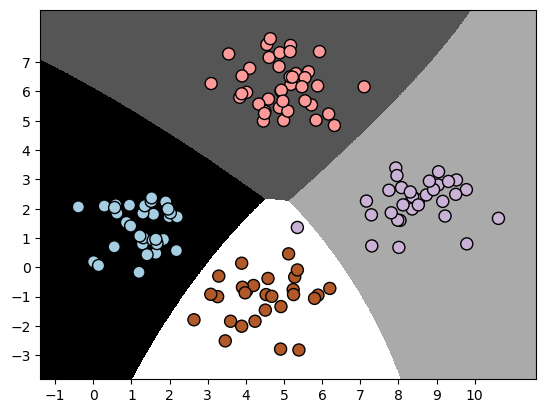

In [35]:
visualize_classifier(classifier_new, X_test, y_test)

### Model Evaluation

In [36]:
num_folds = 3

In [37]:
accuracy_values = cross_val_score(classifier, X,y, scoring='accuracy', cv=num_folds)
print('Cross Validation Accuracy ' + str(round(100 * accuracy_values.mean(), 2)) + '%')

Cross Validation Accuracy 99.75%


In [38]:
precision_values = cross_val_score(classifier, X,y, scoring='precision_weighted', cv=num_folds)
print('Cross Validation Precision ' + str(round(100 * precision_values.mean(), 2)) + '%')

Cross Validation Precision 99.76%


In [39]:
recall_values = cross_val_score(classifier, X,y, scoring='recall_weighted', cv=num_folds)
print('Cross Validation Recall ' + str(round(100 * recall_values.mean(), 2)) + '%')

Cross Validation Recall 99.75%


In [40]:
f1_values = cross_val_score(classifier, X,y, scoring='f1_weighted', cv=num_folds)
print('Cross Validation F1 ' + str(round(100 * f1_values.mean(), 2)) + '%')

Cross Validation F1 99.75%


### Part 5: Classification Quality Metrics

In [41]:
df = pd.read_csv('data_metrics.csv')
df.head(10)

,actual_label,model_RF,model_LR
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532
5,0,0.540665,0.582447
6,0,0.333361,0.376542
7,0,0.309166,0.287872
8,0,0.532531,0.524141
9,0,0.423434,0.435693


In [42]:
threshold = 0.5
df['predicted_RF'] = (df.model_RF >= 0.5).astype('int')
df['predicted_LR'] = (df.model_LR >= 0.5).astype('int')

df.head(10)

,actual_label,model_RF,model_LR,predicted_RF,predicted_LR
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0
5,0,0.540665,0.582447,1,1
6,0,0.333361,0.376542,0,0
7,0,0.309166,0.287872,0,0
8,0,0.532531,0.524141,1,1
9,0,0.423434,0.435693,0,0


#### Confusion Matrix

In [100]:
confusion_matrix(df.actual_label.values, df.predicted_RF.values)
# TN FP
# FN TP

array([[5519, 2360],
       [2832, 5047]])

In [97]:
def lysenko_confusion_matrix(y_true, y_pred):
    TN = find_TN(y_true, y_pred)
    FP = find_FP(y_true, y_pred)
    FN = find_FN(y_true, y_pred)
    TP = find_TP(y_true, y_pred)
    return np.array([[TN, FP],
                     [FN, TP]])

def find_TP(y_true, y_pred):
    return sum((y_true == 1) & (y_pred == 1))

def find_FN(y_true, y_pred):
    return sum((y_true == 1) & (y_pred == 0))

def find_FP(y_true, y_pred):
    return sum((y_true == 0) & (y_pred == 1))

def find_TN(y_true, y_pred):
    return sum((y_true == 0) & (y_pred == 0))

In [98]:
print('TN',find_TN(df.actual_label.values, df.predicted_RF.values))

print('FP',find_FP(df.actual_label.values, df.predicted_RF.values))

print('FN',find_FN(df.actual_label.values, df.predicted_RF.values))

print('TP',find_TP(df.actual_label.values, df.predicted_RF.values))

TN 5519
FP 2360
FN 2832
TP 5047


In [99]:
lysenko_confusion_matrix(df.actual_label.values, df.predicted_RF.values)

array([[5519, 2360],
       [2832, 5047]])

In [65]:
assert np.array_equal(lysenko_confusion_matrix(df.actual_label.values, df.predicted_RF.values),
               confusion_matrix(df.actual_label.values, df.predicted_RF.values),
               'Not correct for RF')

assert np.array_equal(lysenko_confusion_matrix(df.actual_label.values, df.predicted_LR.values),
               confusion_matrix(df.actual_label.values, df.predicted_LR.values),
               'Not correct for LR')

In [66]:
print("My confusion matrix:")
print(lysenko_confusion_matrix(df.actual_label.values, df.predicted_RF.values))

print("Sklearn confusion matrix:")
print(confusion_matrix(df.actual_label.values, df.predicted_RF.values))

My confusion matrix:
[[5519 2360]
 [2832 5047]]
Sklearn confusion matrix:
[[5519 2360]
 [2832 5047]]


#### Accuracy Score

In [118]:
accuracy_score(df.actual_label.values, df.predicted_RF.values)

0.6705165630156111

In [119]:
def lysenko_accuracy_score(y_true, y_pred):
    tnfp, fntp = lysenko_confusion_matrix(y_true, y_pred)
    # TN FP
    # FN TP
    TN,FP = tnfp
    FN, TP = fntp
    return (TP + TN)/(TP + TN + FP + FN)

In [120]:
lysenko_accuracy_score(df.actual_label.values, df.predicted_RF.values)

0.6705165630156111

In [121]:
assert lysenko_accuracy_score(df.actual_label.values, df.predicted_RF.values) ==\
        accuracy_score(df.actual_label.values, df.predicted_RF.values), 'My accuracy failed on RF'
print(f'Accuracy RF: {round(lysenko_accuracy_score(df.actual_label.values, df.predicted_RF.values), 3)}')

assert lysenko_accuracy_score(df.actual_label.values, df.predicted_LR.values) ==\
        accuracy_score(df.actual_label.values, df.predicted_LR.values), 'My accuracy failed on LR'
print(f'Accuracy LR: {round(lysenko_accuracy_score(df.actual_label.values, df.predicted_LR.values), 3)}')


Accuracy RF: 0.671
Accuracy LR: 0.616


#### Recall Score

In [122]:
recall_score(df.actual_label.values, df.predicted_RF.values)

0.6405635232897576

In [123]:
def lysenko_recall_score(y_true, y_pred):
    tnfp, fntp = lysenko_confusion_matrix(y_true, y_pred)
    # TN FP
    # FN TP
    FN, TP = fntp
    return (TP)/(TP+FN)

In [124]:
lysenko_recall_score(df.actual_label.values, df.predicted_RF.values)

0.6405635232897576

In [129]:
assert lysenko_recall_score(df.actual_label.values, df.predicted_RF.values) ==\
        recall_score(df.actual_label.values, df.predicted_RF.values), 'My recall failed on RF'
print(f'Recall RF: {round(lysenko_recall_score(df.actual_label.values, df.predicted_RF.values), 3)}')

assert lysenko_recall_score(df.actual_label.values, df.predicted_LR.values) ==\
        recall_score(df.actual_label.values, df.predicted_LR.values), 'My recall failed on LR'
print(f'Recall LR: {round(lysenko_recall_score(df.actual_label.values, df.predicted_LR.values), 3)}')

Recall RF: 0.641
Recall LR: 0.543


#### Precision Score

In [126]:
precision_score(df.actual_label.values, df.predicted_LR.values)

0.6355265112134264

In [127]:
def lysenko_precision_score(y_true, y_pred):
    tnfp, fntp = lysenko_confusion_matrix(y_true, y_pred)
    # TN FP
    # FN TP
    FP, TP = tnfp[1], fntp[1]
    return (TP)/(TP+FP)

In [128]:
lysenko_precision_score(df.actual_label.values, df.predicted_LR.values)

0.6355265112134264

In [130]:
assert lysenko_precision_score(df.actual_label.values, df.predicted_RF.values) ==\
        precision_score(df.actual_label.values, df.predicted_RF.values), 'My precision failed on RF'
print(f'Precision RF: {round(lysenko_precision_score(df.actual_label.values, df.predicted_RF.values), 3)}')

assert lysenko_precision_score(df.actual_label.values, df.predicted_LR.values) ==\
        precision_score(df.actual_label.values, df.predicted_LR.values), 'My precision failed on LR'
print(f'Precision LR: {round(lysenko_recall_score(df.actual_label.values, df.predicted_LR.values), 3)}')

Precision RF: 0.681
Precision LR: 0.543


#### F1 Score

In [143]:
f1_score(df.actual_label.values, df.predicted_LR.values)

0.5856830002737476

In [135]:
def lysenko_f1_score(y_true, y_pred):
    R = lysenko_recall_score(y_true, y_pred)
    P = lysenko_precision_score(y_true, y_pred)
    return (2 * (P*R))/(P+R)

In [142]:
lysenko_f1_score(df.actual_label.values, df.predicted_LR.values)

0.5856830002737475

In [144]:
assert lysenko_f1_score(df.actual_label.values, df.predicted_RF.values) ==\
        f1_score(df.actual_label.values, df.predicted_RF.values), 'My f1 failed on RF'
print(f'F1 score for RF: {round(lysenko_f1_score(df.actual_label.values, df.predicted_RF.values), 3)}')

assert lysenko_f1_score(df.actual_label.values, df.predicted_LR.values) ==\
        f1_score(df.actual_label.values, df.predicted_LR.values), 'My f1 failed on LR'
print(f'F1 score for LR: {round(lysenko_f1_score(df.actual_label.values, df.predicted_LR.values), 3)}')

F1 score for RF: 0.66


AssertionError: My f1 failed on LR